<a href="https://colab.research.google.com/github/AhmedAlmijbari/DoublePendulum/blob/main/QuestionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Assignemt

In [104]:
from numpy import sin, cos
import numpy as np
import scipy as sp
import scipy.constants
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

G = 9.81  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 60  # how many seconds to simulate
history_len = 6000  # how many trajectory points to display

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.01
t = np.arange(0, t_stop, dt)

In [105]:
def derivs(t, state):

    #Adding the damping torque and spring
    beta=b*state[3]+0.5*K*state[2]**2
    F1=0
    F2=-2*(M1+M2)*beta/M2

    A = state[1]

    delta = state[0] - state[2]
    B = (
               (M2 * L1 * state[1]**2 * sin(2*delta)
                + 2*M2 * L2 * state[3]**2 * sin(delta)
                + 2*G*M2 * cos(state[2]) * sin(delta)
                + 2*G*M1 * sin(state[0])
                + F1
                )
                /
                 (
                    -2*L1*(M1+M2*(sin(delta))**2)
                  )
               )

    C = state[3]

    D = (
               (M2 * L2 * state[3]**2 * sin(2*delta)
                + 2*(M1+M2) * L1 * state[1] **2 * sin(delta)
                + 2*(M1+M2) * G * cos(state[0]) * sin(delta)
                + F2
                )
               /
                (
                    2*L2*(M1+M2*(sin(delta))**2)
                  )
               )

    return A,B,C,D

In [106]:
def plotSolution(t,y):
  fig, ax = plt.subplots(nrows=2,figsize=(8 ,5))
  ax[0].plot(t,y.y[0] ,label=r'$\vartheta_1$')
  ax[0].plot(t,y.y[2] ,label=r'$\vartheta_2$')
  ax[0].set_xlabel(r'$t$')
  ax[0].set_ylabel(r'$\vartheta$ (degrees)')
  ax[0].legend()
  ax[1].plot(t,y.y[1],'--',label=r'$\omega_1$')
  ax[1].plot(t,y.y[3],'--',label=r'$\omega_2$')
  ax[1].set_xlabel(r'$t$')
  ax[1].set_ylabel(r'$\mathrm{d}\vartheta/\mathrm{d}t$ (degrees/time)')
  ax[1].legend()
  plt.tight_layout()

In [107]:
#Adding the effect of damping and spring
#K,b=0,0
#k,b=1,2
#k,b=10,20

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
#th1 = 90 , w1 = 0.0 , th2 = 0, w2 = 0.0
#th1 = 90 , w1 = 0.0 , th2 = 0, w2 = 1800

# initial state
#state = np.radians([th1, w1, th2, w2])

In [108]:
#The trajectories for all cases
x1=np.zeros((6,6000));
x2=np.zeros((6,6000));

#First Case
**- (k,b)=(0,0)**

th1 = 90 , w1 = 0.0 , th2 = 0, w2 = 0.0

In [109]:
K,b=0,0
th1 = 90; w1 = 0.0; th2 = 0.0; w2 = 0.0
state = np.radians([th1, w1, th2, w2])

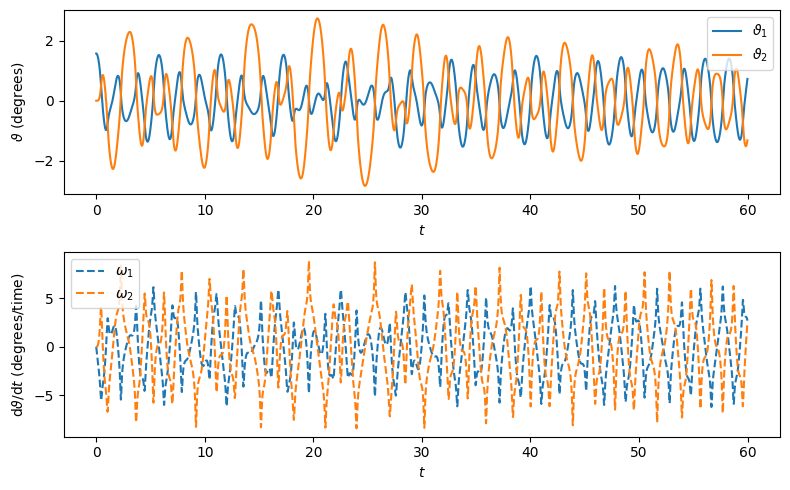

In [110]:
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t)
plotSolution(t,y)

In [111]:
x1[0,:]=y.y[0]
x2[0,:]=y.y[2]

th1 = 90 , w1 = 0.0 , th2 = 0, w2 = 1800

In [112]:
K,b=0,0
th1 = np.pi/2; w1 = 0.0; th2 = 0.0; w2 = 10*np.pi
state = [th1, w1, th2, w2]

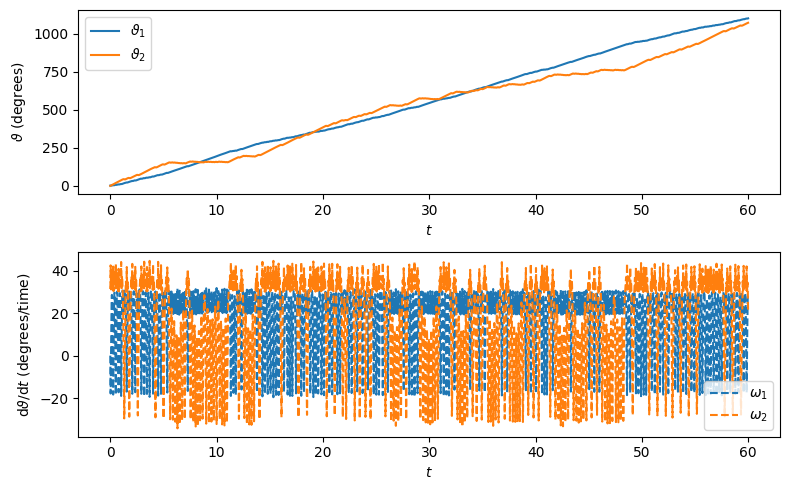

In [113]:
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t)
plotSolution(t,y)

In [114]:
x1[1,:]=y.y[0]
x2[1,:]=y.y[2]

#Second Case
**- (k,b)=(1,2)**

th1 = 90 , w1 = 0.0 , th2 = 0, w2 = 0

In [115]:
K,b=1,2
th1 = np.pi/2; w1 = 0.0; th2 = 0.0; w2 = 0
state = [th1, w1, th2, w2]

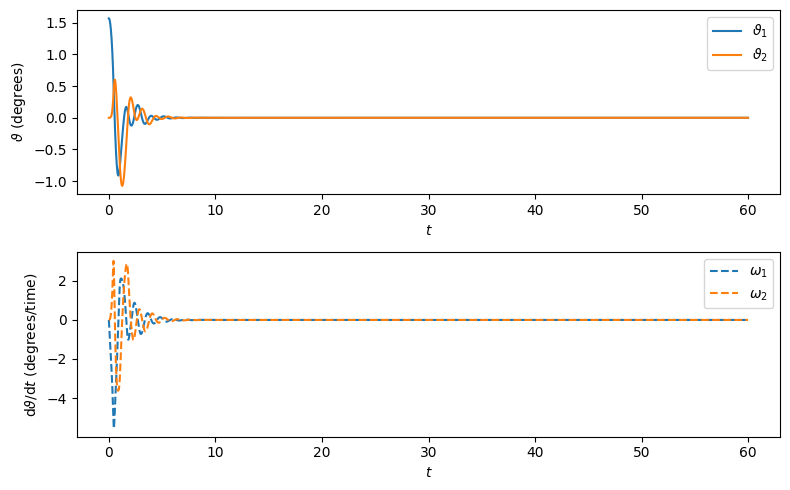

In [116]:
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t)
plotSolution(t,y)

In [117]:
x1[2,:]=y.y[0]
x2[2,:]=y.y[2]

th1 = pi/2 , w1 = 0.0 , th2 = 0, w2 = 10*pi

In [118]:
K,b=1,2
th1 = np.pi/2; w1 = 0.0; th2 = 0.0; w2 =10*np.pi
state = [th1, w1, th2, w2]

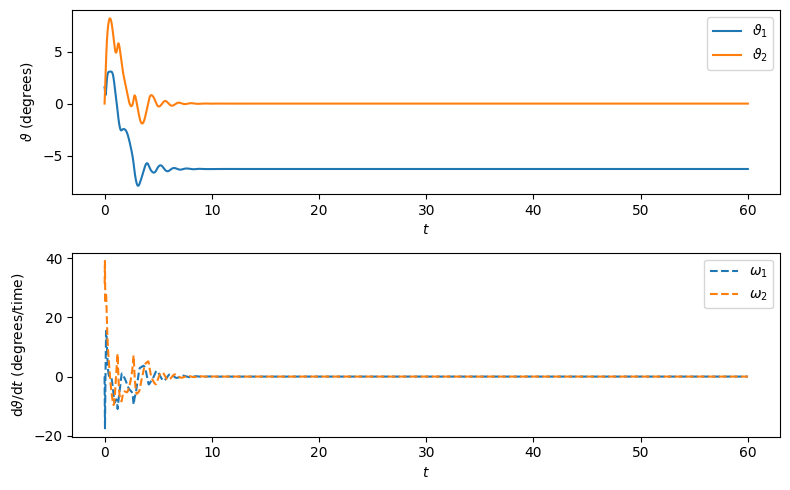

In [119]:
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t)
plotSolution(t,y)

In [120]:
x1[3,:]=y.y[0]
x2[3,:]=y.y[2]

#Third case
**- (k,b)=(10,20)**

th1 = 90 , w1 = 0.0 , th2 = 0, w2 = 0


In [121]:
K,b=10,20
th1 = np.pi/2; w1 = 0.0; th2 = 0.0; w2 = 0
state = [th1, w1, th2, w2]

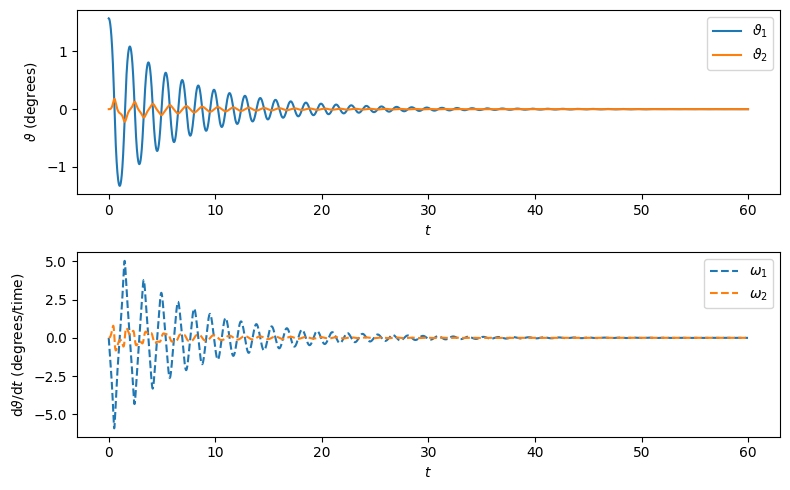

In [122]:
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t)
plotSolution(t,y)

In [123]:
x1[4,:]=y.y[0]
x2[4,:]=y.y[2]

th1 = pi/2 , w1 = 0.0 , th2 = 0, w2 = 10*pi


In [124]:
K,b=10,20
th1 = np.pi/2; w1 = 0.0; th2 = 0.0; w2 =10*np.pi
state = [th1, w1, th2, w2]

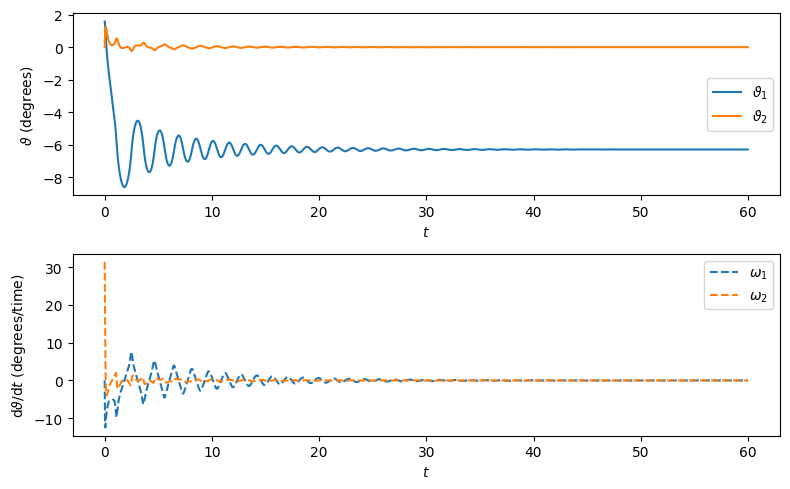

In [125]:
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t)
plotSolution(t,y)

In [126]:
x1[5,:]=y.y[0]
x2[5,:]=y.y[2]

In [51]:
normalised_x1=x1;
normalised_x2=x2;

PCA Analysis


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [53]:
normalised_x1 = StandardScaler().fit_transform(normalised_x1)
normalised_x2 = StandardScaler().fit_transform(normalised_x2)


In [54]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalised_x1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],index=['First case:w2=0', 'First case:w2=10*pi', 'Second case:w2=0', 'Second case:w2=10*pi','Third case:w2=0', 'Third case:w2=10*pi'])

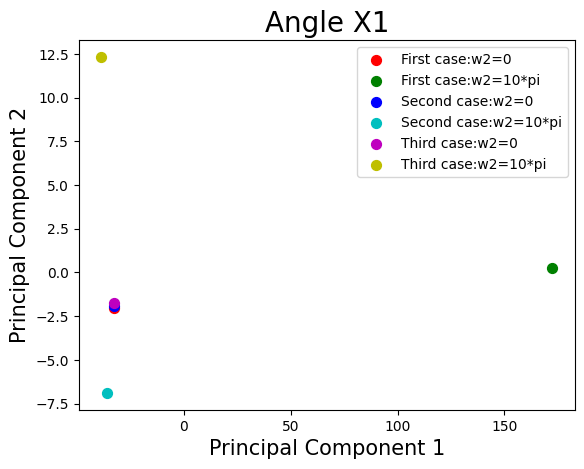

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Angle X1', fontsize = 20)

targets = ['First case:w2=0', 'First case:w2=10*pi', 'Second case:w2=0', 'Second case:w2=10*pi','Third case:w2=0', 'Third case:w2=10*pi']
colors = ['r', 'g', 'b','c'	,'m','y']
for target, color in zip(targets,colors):
    indicesToKeep =  principalDf.index == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)

In [56]:
pca.explained_variance_ratio_


array([0.99099569, 0.00584733])

#Machine learning Model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model


In [58]:
X=np.array([x1[0,:],x2[0,:]]).T

In [59]:
def coordinate(theta1,theta2):
  x=sin(theta1)+sin(theta2)
  y=-cos(theta1)-cos(theta2)
  return np.array([x,y]).T

In [60]:
output=coordinate(X[:,0],X[:,1])

In [61]:
Feature=np.array([x1[0,:],x2[0,:],x1[0,:]**2,x2[0,:]**2,x1[0,:]**3,x2[0,:]**3,x1[0,:]**4,x2[0,:]**4,x1[0,:]**5,x2[0,:]**5]).T

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


X_train, X_test, y_train, y_test = train_test_split(Feature, output, test_size=0.4, random_state=0)

In [72]:
linmodel = linear_model.LinearRegression(fit_intercept=True)
linmodel.fit(X_train, y_train)
linmodel.score(X_test, y_test)

0.999866400879103

In [73]:
Prediction=linmodel.predict(X_test)

Test on different Case

In [74]:
X=np.array([x1[2,:],x2[2,:]]).T
output=coordinate(X[:,0],X[:,1])

In [75]:
Feature=np.array([x1[2,:],x2[2,:],x1[2,:]**2,x2[2,:]**2,x1[2,:]**3,x2[2,:]**3,x1[2,:]**4,x2[2,:]**4,x1[2,:]**5,x2[2,:]**5]).T

In [76]:
linmodel.score(Feature, output)

0.99345485710829

##Animation

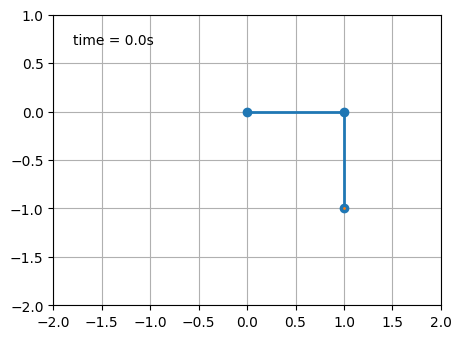

In [140]:
K,b=10,20
th1 = np.pi/2; w1 = 0.0; th2 = 0.0; w2 =10*np.pi
state = [th1, w1, th2, w2]
y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state,'Radau', t_eval=t).y.T



x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
plt.show()

In [141]:
f = r"/content/drive/MyDrive/Animation/animation_case6.gif"
writergif = animation.PillowWriter(fps=30)
ani.save(f,writer=writergif)

Plotting

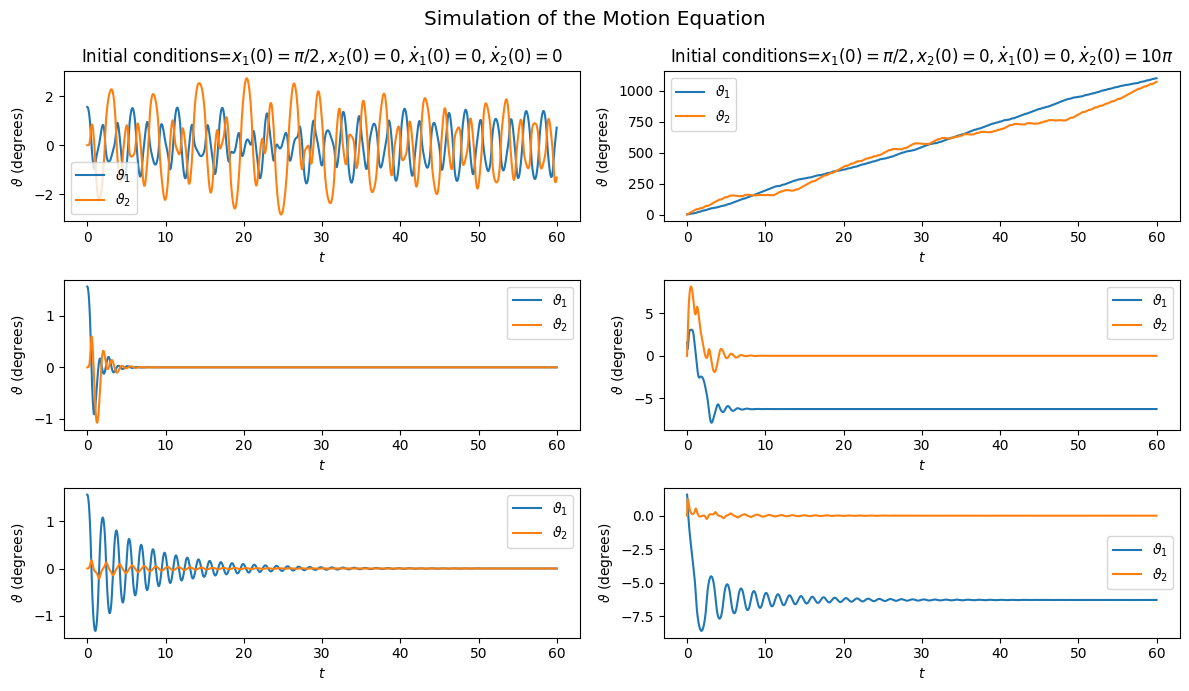

In [353]:
  fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(12 ,7))
  fig.subplots_adjust(top=0.78)

  fig.suptitle("Simulation of the Motion Equation", fontsize='x-large')
  ax[0,0].plot(t,x1[0,:] ,label=r'$\vartheta_1$')
  ax[0,0].plot(t,x2[0,:] ,label=r'$\vartheta_2$')
  ax[0,0].set_xlabel(r'$t$')
  ax[0,0].set_ylabel(r'$\vartheta$ (degrees)')
  ax[0,0].legend()
  ax[0,0].title.set_text('Initial conditions=$x_1(0)=\pi/2,x_2(0)=0,\dot{x}_1(0)=0,\dot{x}_2(0)=0$')
  #ax[0].title.set_text('Parameters: (k,b)=(0,0)')


  ax[0,1].plot(t,x1[1,:] ,label=r'$\vartheta_1$')
  ax[0,1].plot(t,x2[1,:] ,label=r'$\vartheta_2$')
  ax[0,1].set_xlabel(r'$t$')
  ax[0,1].set_ylabel(r'$\vartheta$ (degrees)')
  ax[0,1].legend()
  ax[0,1].title.set_text('Initial conditions=$x_1(0)=\pi/2,x_2(0)=0,\dot{x}_1(0)=0,\dot{x}_2(0)=10\pi$')


  ax[1,0].plot(t,x1[2,:] ,label=r'$\vartheta_1$')
  ax[1,0].plot(t,x2[2,:] ,label=r'$\vartheta_2$')
  ax[1,0].set_xlabel(r'$t$')
  ax[1,0].set_ylabel(r'$\vartheta$ (degrees)')
  ax[1,0].legend()




  ax[1,1].plot(t,x1[3,:] ,label=r'$\vartheta_1$')
  ax[1,1].plot(t,x2[3,:] ,label=r'$\vartheta_2$')
  ax[1,1].set_xlabel(r'$t$')
  ax[1,1].set_ylabel(r'$\vartheta$ (degrees)')
  ax[1,1].legend()



  ax[2,0].plot(t,x1[4,:] ,label=r'$\vartheta_1$')
  ax[2,0].plot(t,x2[4,:] ,label=r'$\vartheta_2$')
  ax[2,0].set_xlabel(r'$t$')
  ax[2,0].set_ylabel(r'$\vartheta$ (degrees)')
  ax[2,0].legend()




  ax[2,1].plot(t,x1[5,:] ,label=r'$\vartheta_1$')
  ax[2,1].plot(t,x2[5,:] ,label=r'$\vartheta_2$')
  ax[2,1].set_xlabel(r'$t$')
  ax[2,1].set_ylabel(r'$\vartheta$ (degrees)')
  ax[2,1].legend()


plt.tight_layout()

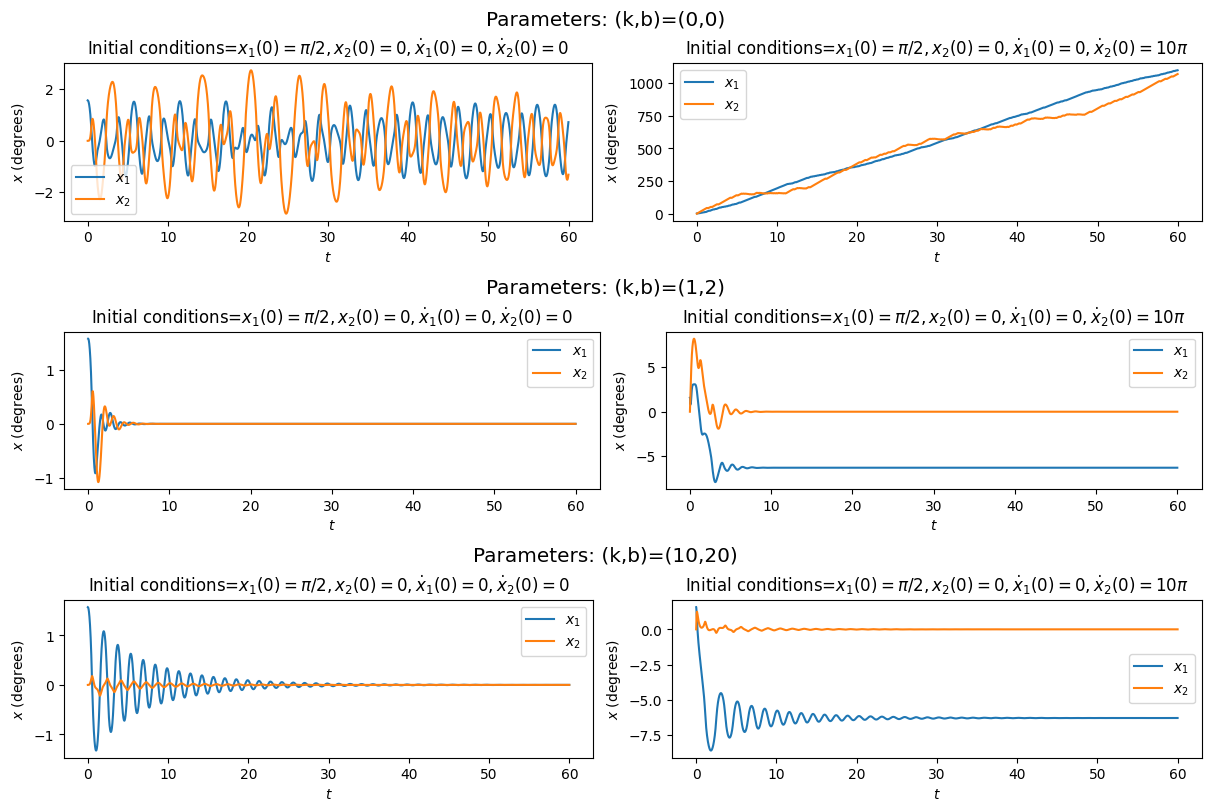

In [26]:
import matplotlib.pyplot as plt
import numpy as np

n=0;

colors = ["b", "g", "r", "violet"]

fig = plt.figure(figsize=(12 ,8), constrained_layout=True)


subfigs = fig.subfigures(3, 1)
titles = ["Parameters: (k,b)=(0,0)", "Parameters: (k,b)=(1,2)","Parameters: (k,b)=(10,20)"]
for i, subfig in enumerate(subfigs):
    axes = subfig.subplots(1, 2)
    for j, row in enumerate(axes):
            row.plot(t,x1[n,:] ,label=r'$x_1$')
            row.plot(t,x2[n,:] ,label=r'$x_2$')
            row.set_xlabel(r'$t$')
            row.set_ylabel(r'$x$ (degrees)')
            row.legend()

            n=n+1

            if j==0:
                row.set_title('Initial conditions=$x_1(0)=\pi/2,x_2(0)=0,\dot{x}_1(0)=0,\dot{x}_2(0)=0$')
            if j==1:
                row.set_title('Initial conditions=$x_1(0)=\pi/2,x_2(0)=0,\dot{x}_1(0)=0,\dot{x}_2(0)=10\pi$')
    subfig.suptitle(titles[i],fontsize='x-large')
#fig.suptitle("Very long figure title over the whole figure extent", fontsize='xx-large')
plt.show()